# Discussion 4

## Discussion Notes

In [1]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
print diamonds.dtypes
diamonds.head()

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Indexing

Pandas supports [5 different types of indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html). Entire columns can be accessed by label as attributes or with `[ ]`:

In [12]:
# Attributes: index a single column by label
print diamonds.carat.head()
# [ ]: index columns by label
print diamonds["carat"].head()

print diamonds[["carat", "cut"]].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64
0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64
   carat      cut
0   0.23    Ideal
1   0.21  Premium
2   0.23     Good
3   0.29  Premium
4   0.31     Good


Pandas uses the special attributes `.loc`, `.iloc`, and `.ix` for multi-axis indexing:

In [13]:
# .loc: index with labels or boolean values
print diamonds.loc[:, ("carat", "cut")].head()

# .iloc: index with integer positions
print diamonds.iloc[:, 0].head()

# .ix: index with a mix of labels and integer positions
# (pandas will try to guess what you mean)
print diamonds.ix[:, "carat"].head()
print diamonds.ix[:, 0].head()

   carat      cut
0   0.23    Ideal
1   0.21  Premium
2   0.23     Good
3   0.29  Premium
4   0.31     Good
0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64
0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64
0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64


Indexing can return a reference or a copy. Pandas doesn't have well-documented rules about when copies are made. In general, you should [avoid chained indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#returning-a-view-versus-a-copy). Use `.loc`, `.iloc`, or `.ix` when you want to modify part of a data frame.

### Text Processing

When making comparisons, columns of strings behave just like any other column:

In [15]:
(diamonds["cut"] == "Ideal").head()

0     True
1    False
2    False
3    False
4    False
Name: cut, dtype: bool

Python has a "batteries included" standard library, which means modules for handling common tasks are built-in. The [string methods](https://docs.python.org/2/library/stdtypes.html#string-methods) are an excellent example. They are simpler and faster than regular expressions, but still flexible enough for most text processing jobs.

In [16]:
"This is a sentence".startswith("The")

False

Pandas uses the `object` data type (sometimes shown as `'O'`) for strings and also for other types of data.

In [22]:
diamonds.cut.dtype

dtype('O')

In order to use string methods on an `object` column, use the `.str` attribute:

In [23]:
# .str tells pandas to treat a column like strings
diamonds["cut"].str.startswith("Idea").head()

0     True
1    False
2    False
3    False
4    False
Name: cut, dtype: bool

See the [Pandas documentation on text processing](http://pandas.pydata.org/pandas-docs/stable/text.html) for more details.

### Visualization

Python has lots of different packages for making plots. Here are a few of the most popular:

* [Matplotlib](http://matplotlib.org/) ([tutorial](http://matplotlib.org/users/pyplot_tutorial.html))
    * [Pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
    * [Seaborn](http://seaborn.pydata.org/)
    * [ggplot](http://ggplot.yhathq.com/)
* [Altair](https://altair-viz.github.io/)
* [Bokeh](http://bokeh.pydata.org/en/latest/)
* ...

This blog post has examples comparing several of these packages: [A Dramatic Tour through Python's Data Visualization Landscape](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

Matplotlib is flexible but not concise. Pandas, Seaborn, and ggplot are more convenient for exploratory data analysis. Since all 3 are based on Matplotlib, you can still use Matplotlib to customize or put finishing touches on the plots they produce.

Below are 3 examples of how to make faceted plots with Matplotlib, Pandas, and Seaborn.

### Scatterplots

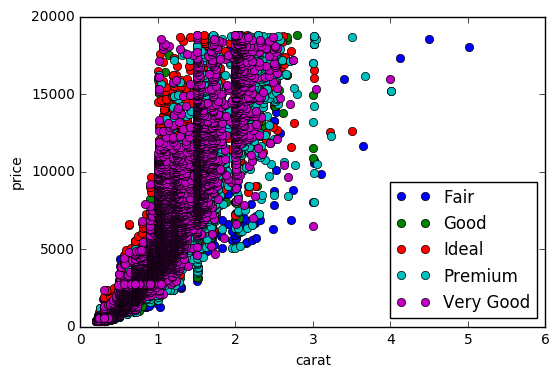

In [19]:
# Matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

def scatter(group):
    plt.plot(group["carat"], group["price"], "o", label = group.name)
    
diamonds.groupby("cut").apply(scatter)
ax.set(xlabel = "carat", ylabel = "price")
ax.legend(loc = 4)

plt.show()

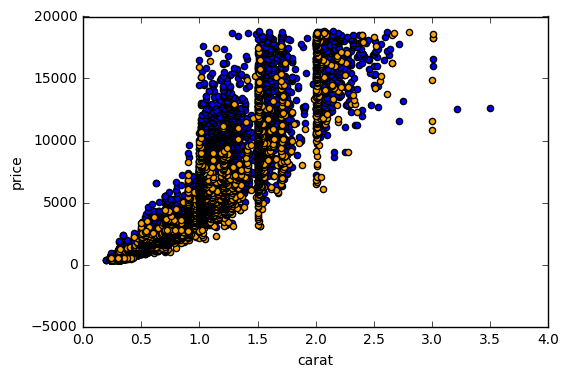

In [20]:
# Pandas

ax = diamonds[diamonds.cut == "Ideal"].plot.scatter("carat", "price", color = "Blue")

diamonds[diamonds.cut == "Good"].plot.scatter("carat", "price", color = "Orange", ax = ax)
# ...

plt.show()

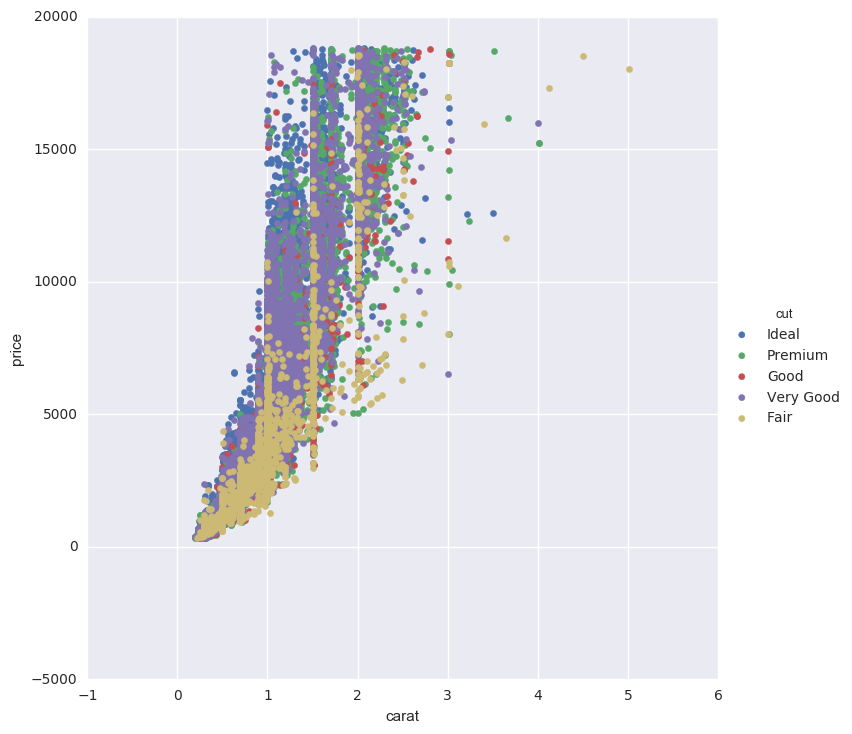

In [22]:
# Seaborn
import seaborn as sns

facets = sns.FacetGrid(diamonds, hue = "cut", size = 7.5)
facets.map(plt.scatter, "carat", "price").add_legend()
plt.show()

### Boxplots

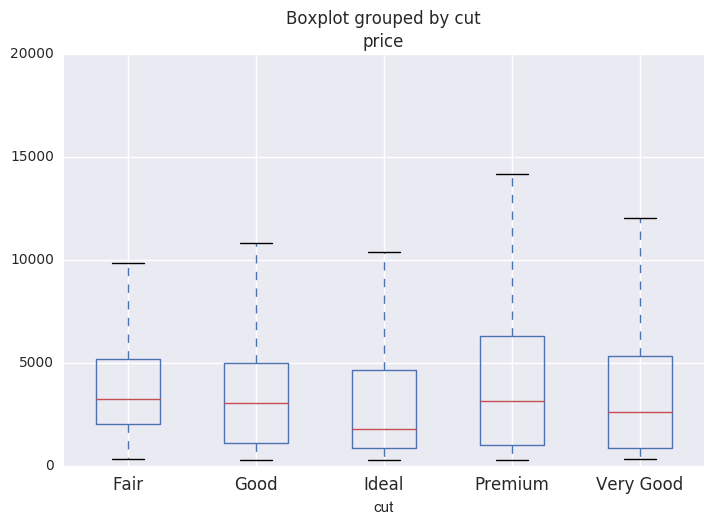

In [23]:
# Pandas

diamonds.boxplot("price", "cut")
plt.show()

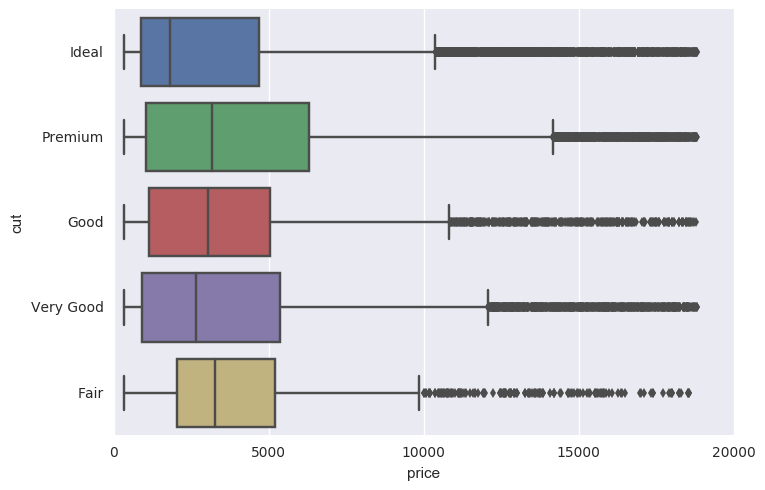

In [24]:
# Seaborn

sns.boxplot("price", "cut", data = diamonds)
plt.show()

### Barplots

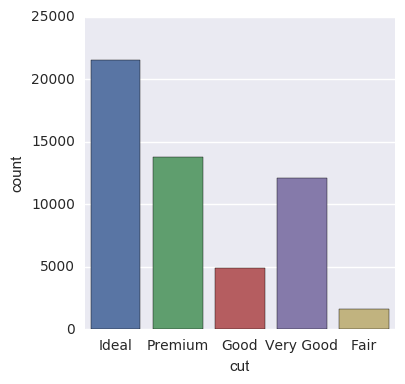

In [25]:
# Seaborn

sns.factorplot("cut", data = diamonds, kind = "count")
plt.show()

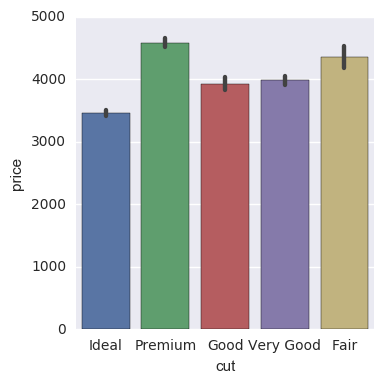

In [27]:
# Seaborn

sns.factorplot("cut", "price", data = diamonds, kind = "bar")
plt.show()

## Questions

__Q:__ How does the slicing operator `:` work?

The syntax is `begin:end+1:step`. For example:

In [32]:
range(100)[0:10:2] # 0 to 9, by 2s

[0, 2, 4, 6, 8]

The step is 1 by default, so you can usually omit the step argument:

In [31]:
range(100)[0:10] # 0 to 9, by 1s

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

When begin is omitted, the slice starts from the beginning of the array. When end is omitted, the slice ends at the end of the array. For instance:

In [30]:
range(100)[::5] # beginning to end, by 5s

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

__Q:__ How to extract data from multiple files?

The strategy is the same for almost any language:

1. Get a list of the files.
2. Iterate over the files. Extract and store the data for each file.
3. Combine the extracted data.

Step 2 is the key: you focus on extracting data from __one file__ at a time. This makes the problem a lot simpler, which is a good thing.

In Python, check out `os.listdir` for step 1. Use a loop or comprehension for the iteration in step 2. Finally, use `np.concat` to combine data frames in step 3. This is just one way to do it; other solutions are possible.

Using comprehensions works especially well if you break your code into small functions:

In [ ]:
# NOTE: The code in this cell is intentionally incomplete. Running it will produce an error.
import os

def extract_fresh(fname):
    # Extract and return the "Fresh" rows for one file (fname).
    # ...
    pass

# Step 1-2
data = (extract_fresh(x) for x in os.listdir("fruit") if x.endswith("xlsx"))
# Step 3
pd.concat(data) # stack the rows together

The `pass` command does nothing. It's used as a placeholder for code that hasn't been written yet.

In [33]:
pass

__Q:__ Which programming languages are popular in industry?

A good programmer chooses the language based on the problem they want to solve. Every language has strengths and weaknesses.

Here are some of the most popular languages for various kinds of software:

* Statistics: R, Python, SAS, Julia
* Engineering/Physics: MATLAB, Python, Julia
* High-performance Computing (HPC): C, C++, Fortran
* Video Games: C, C++, Lua
* Websites (client-side): HTML, CSS, JavaScript
* Websites (server-side): Java, PHP, JavaScript, Python, Ruby
* Desktop Applications: C, C++, C#, Java

For a data scientist, it's useful to know a few languages for statistics (such as R and Python) as well as a language for HPC (such as C).

The [TIOBE Index](http://www.tiobe.com/tiobe-index/) is a popular ranking of programming languages. There's also a nice analysis of the popularity of statistical tools/languages on [r4stats.com](http://r4stats.com/articles/popularity/). Both are based on real data.